# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import DateTime as datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
#Set units for search
#units= "metric"

In [6]:
url = 'https://api.openweathermap.org/data/2.5/weather?appid=' + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?appid=5ffc3fe05c8cbec15b1f8fdd119944e3


In [7]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?appid=' + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #city_url = f"{url}appid={weather_api_key}&q{city}&units={units}"

    # Log the url, record, and set numbers
    #print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather= weather_response.json()
        print(city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
{'coord': {'lon': -12.3116, 'lat': -37.0676}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 287.02, 'feels_like': 286.45, 'temp_min': 287.02, 'temp_max': 287.02, 'pressure': 1035, 'humidity': 76, 'sea_level': 1035, 'grnd_level': 1031}, 'visibility': 10000, 'wind': {'speed': 2.78, 'deg': 19, 'gust': 3.02}, 'rain': {'1h': 0.22}, 'clouds': {'all': 85}, 'dt': 1730754836, 'sys': {'country': 'SH', 'sunrise': 1730698798, 'sunset': 1730748338}, 'timezone': 0, 'id': 3370726, 'name': 'Edinburgh of the Seven Seas', 'cod': 200}
Processing Record 2 of Set 1 | ushuaia
{'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 282.06, 'feels_like': 281.49, 'temp_min': 282.06, 'temp_max': 282.06, 'pressure'

In [8]:
print(city_data)

[{'City': 'edinburgh of the seven seas', 'Lat': -37.0676, 'Lng': -12.3116, 'Max Temp': 287.02, 'Humidity': 76, 'Cloudiness': 85, 'Wind Speed': 2.78, 'Country': 'SH', 'Date': 1730754836}, {'City': 'ushuaia', 'Lat': -54.8, 'Lng': -68.3, 'Max Temp': 282.06, 'Humidity': 66, 'Cloudiness': 51, 'Wind Speed': 1.56, 'Country': 'AR', 'Date': 1730754726}, {'City': 'mikhaylov', 'Lat': 54.2292, 'Lng': 39.0186, 'Max Temp': 269.39, 'Humidity': 94, 'Cloudiness': 38, 'Wind Speed': 5.97, 'Country': 'RU', 'Date': 1730754838}, {'City': 'adamstown', 'Lat': -25.066, 'Lng': -130.1015, 'Max Temp': 294.45, 'Humidity': 80, 'Cloudiness': 95, 'Wind Speed': 8.28, 'Country': 'PN', 'Date': 1730754839}, {'City': 'isafjordur', 'Lat': 66.0755, 'Lng': -23.124, 'Max Temp': 275.52, 'Humidity': 83, 'Cloudiness': 100, 'Wind Speed': 2.12, 'Country': 'IS', 'Date': 1730754841}, {'City': 'bethel', 'Lat': 41.3712, 'Lng': -73.414, 'Max Temp': 285.34, 'Humidity': 66, 'Cloudiness': 40, 'Wind Speed': 2.57, 'Country': 'US', 'Date': 1

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,287.02,76,85,2.78,SH,1730754836
1,ushuaia,-54.8000,-68.3000,282.06,66,51,1.56,AR,1730754726
2,mikhaylov,54.2292,39.0186,269.39,94,38,5.97,RU,1730754838
3,adamstown,-25.0660,-130.1015,294.45,80,95,8.28,PN,1730754839
4,isafjordur,66.0755,-23.1240,275.52,83,100,2.12,IS,1730754841


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,287.02,76,85,2.78,SH,1730754836
1,ushuaia,-54.8000,-68.3000,282.06,66,51,1.56,AR,1730754726
2,mikhaylov,54.2292,39.0186,269.39,94,38,5.97,RU,1730754838
3,adamstown,-25.0660,-130.1015,294.45,80,95,8.28,PN,1730754839
4,isafjordur,66.0755,-23.1240,275.52,83,100,2.12,IS,1730754841


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

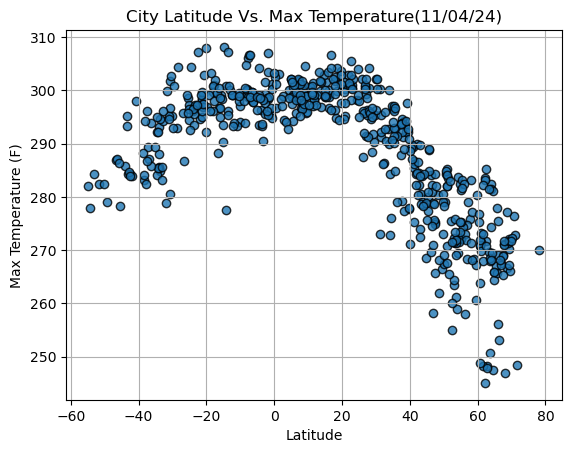

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=.8, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

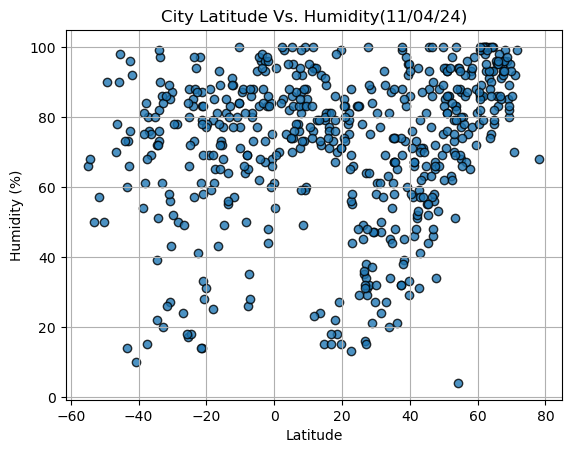

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=.8, edgecolors='k')
# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

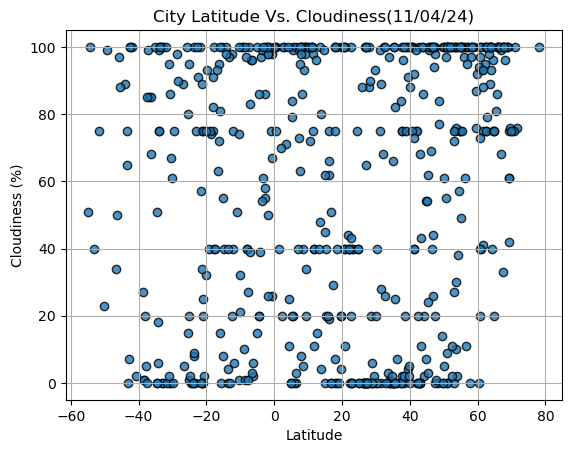

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=.8, edgecolors='k')

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

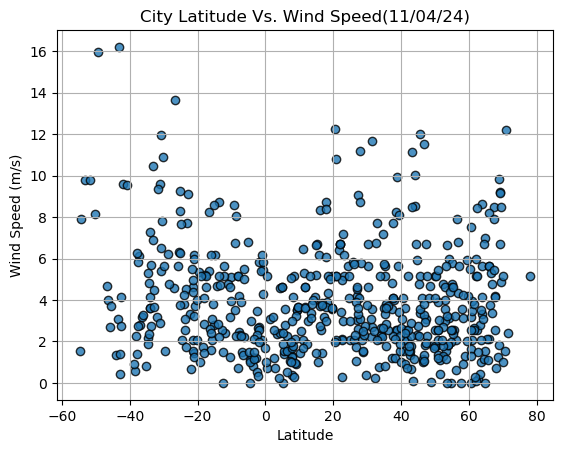

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=.8, edgecolors='k')

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, marker="o", edgecolor="black", linewidths=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()
    

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mikhaylov,54.2292,39.0186,269.39,94,38,5.97,RU,1730754838
4,isafjordur,66.0755,-23.1240,275.52,83,100,2.12,IS,1730754841
5,bethel,41.3712,-73.4140,285.34,66,40,2.57,US,1730754842
6,hawaiian paradise park,19.5933,-154.9731,297.54,99,100,5.14,US,1730754843
7,tha kham,9.1107,99.2321,299.37,100,100,0.89,TH,1730754844


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,287.02,76,85,2.78,SH,1730754836
1,ushuaia,-54.8000,-68.3000,282.06,66,51,1.56,AR,1730754726
3,adamstown,-25.0660,-130.1015,294.45,80,95,8.28,PN,1730754839
11,capitao poco,-1.7464,-47.0594,303.45,48,50,5.84,BR,1730754849
12,lautoka,-17.6167,177.4667,301.07,61,40,4.63,FJ,1730754850


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8495812434562154


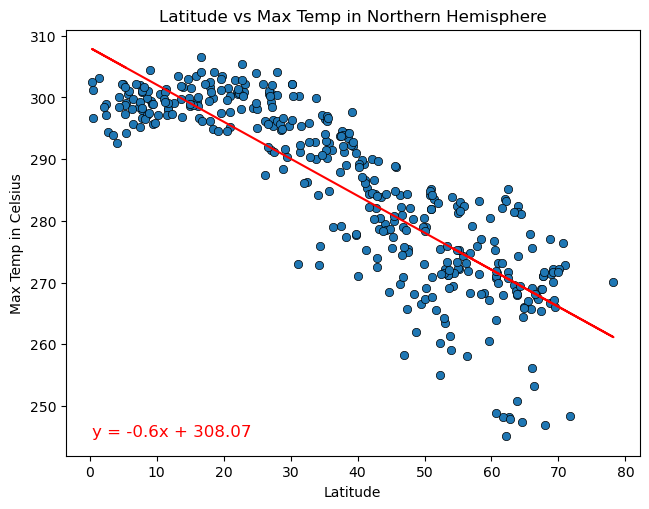

In [20]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

plt.xlabel("Latitude")
plt.ylabel("Max Temp in Celsius")
plt.title("Latitude vs Max Temp in Northern Hemisphere")
plt.show()

The r-value is: 0.654665998851754


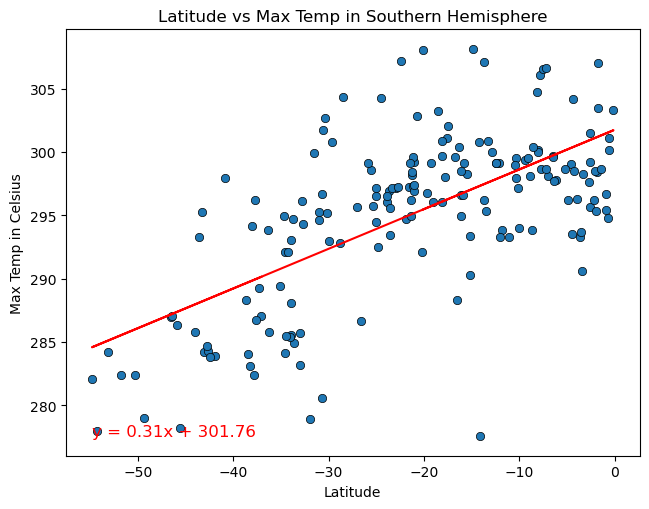

In [21]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

plt.xlabel("Latitude")
plt.ylabel("Max Temp in Celsius")
plt.title("Latitude vs Max Temp in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23830090442885513


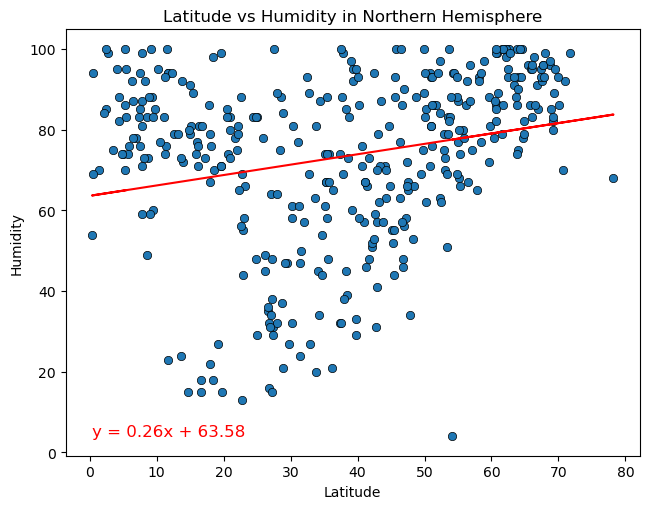

In [22]:
# Northern Hemisphere
linregress_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity in Northern Hemisphere")
plt.show()

The r-value is: 0.17030679217649716


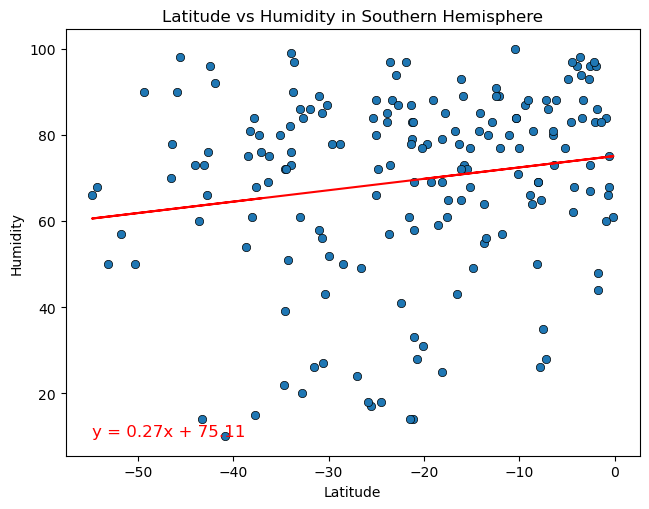

In [28]:
# Southern Hemisphere
linregress_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

Based on both "r-values" their is little correlation between the humidity and the lattitude.

When we look at the data, it seems that the cities far from the equator are more humid but it would be interesting to look at the data year over year.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23693949544958395


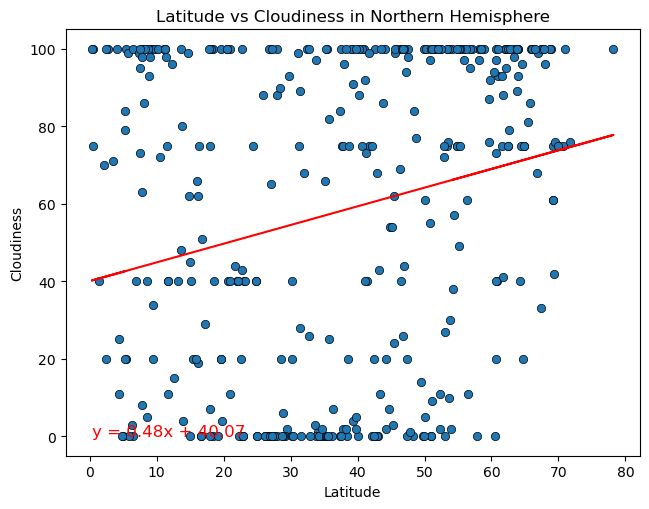

In [29]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness in Northern Hemisphere")
plt.show()

The r-value is: 0.07314587095164153


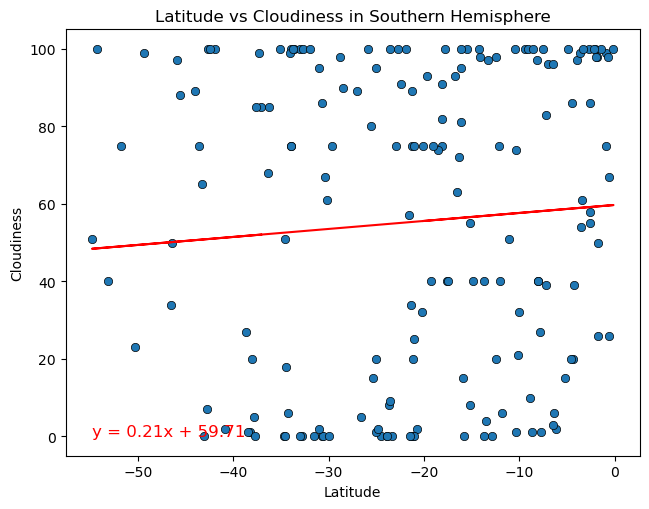

In [30]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

Based on both "r-values" their is little correlation between the cloudiness and the lattitude.

When we look at the scatter plots, we can see that the cities in the northern hemisphere have more cloud coverage above 60% than the cities in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07399793908205889


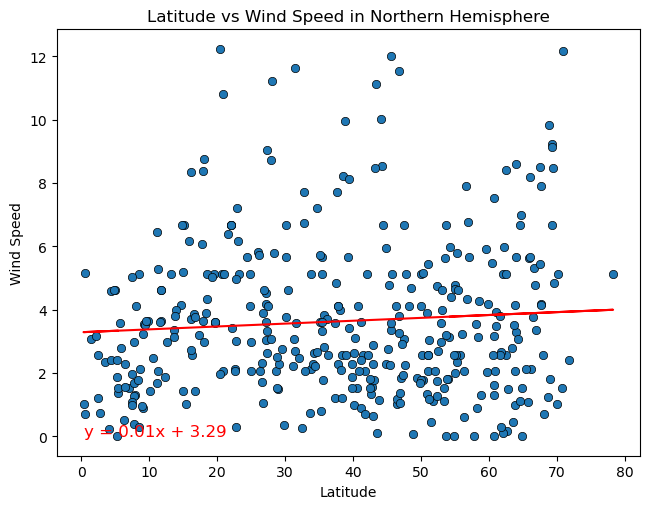

In [31]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed in Northern Hemisphere")
plt.show()

The r-value is: -0.3020935415022923


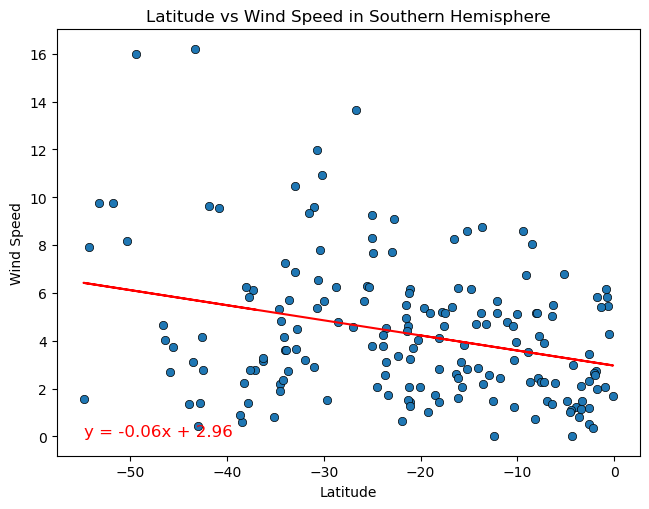

In [32]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

Based on the "r-value" there is little correlation between Wind Speed and City Latitude for both hemispheres.